In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm 
from sklearn.linear_model import LinearRegression 
from ISLP.models import summarize, poly 
from ISLP.models import ModelSpec as MS 
from ISLP import load_data 
%matplotlib inline


In [18]:
carseats = load_data("Carseats") 
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


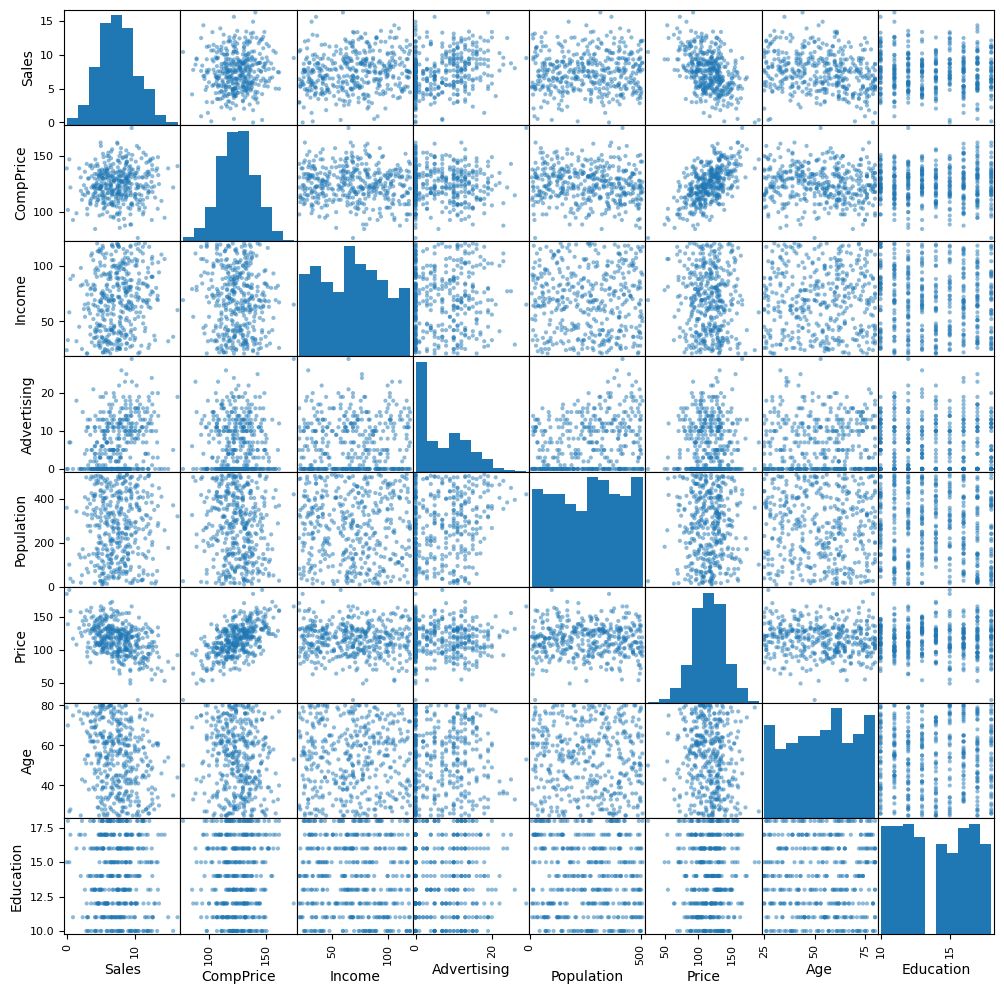

In [19]:
pd.plotting.scatter_matrix(carseats,figsize=(12,12));

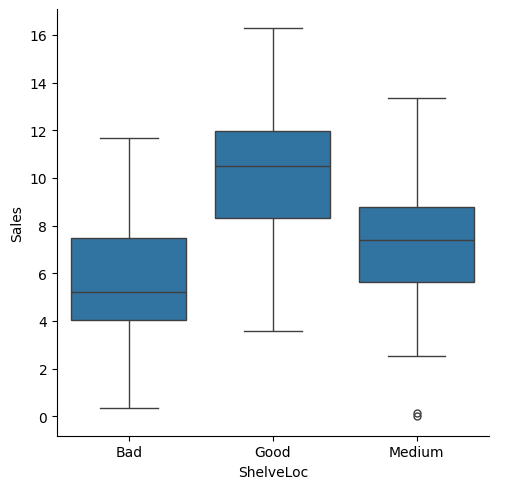

In [20]:
sns.catplot(data=carseats, x="ShelveLoc", y="Sales",kind="box"); 

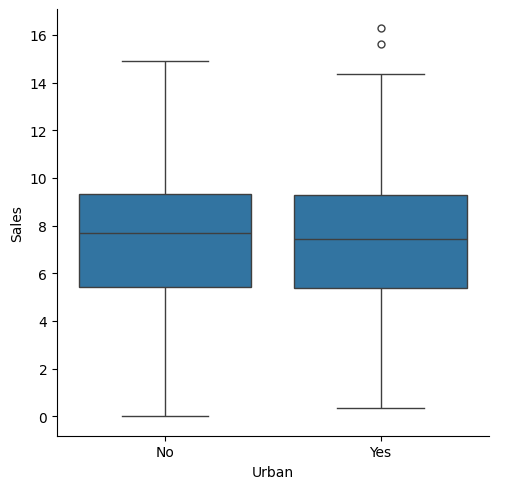

In [21]:
sns.catplot(data=carseats, x="Urban", y="Sales",kind="box"); 


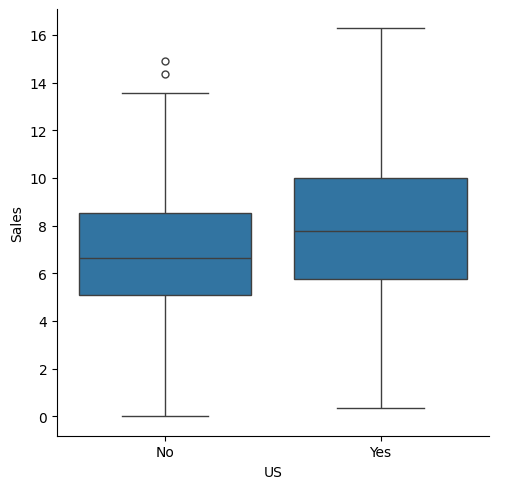

In [22]:
sns.catplot(data=carseats, x="US", y="Sales",kind="box"); 

In [23]:
y = carseats["Sales"] 
X = MS(["Price", "Advertising","Age","ShelveLoc","US"]).fit_transform(carseats) 
results = sm.OLS(y, X).fit() 
summarize(results)


,coef,std err,t,P>|t|
intercept,14.4695,0.517,27.961,0.000
Price,-0.0615,0.003,-18.192,0.000
Advertising,0.1090,0.016,6.647,0.000
Age,-0.0500,0.005,-10.129,0.000
ShelveLoc[Good],4.8171,0.237,20.337,0.000
ShelveLoc[Medium],1.9391,0.195,9.957,0.000
US[Yes],0.0067,0.228,0.029,0.977


In [24]:
X = MS(["Price", "Advertising","Age","ShelveLoc"]).fit_transform(carseats) 
results = sm.OLS(y, X).fit() 
summarize(results)

,coef,std err,t,P>|t|
intercept,14.4712,0.514,28.168,0.0
Price,-0.0615,0.003,-18.227,0.0
Advertising,0.1093,0.012,9.145,0.0
Age,-0.0500,0.005,-10.144,0.0
ShelveLoc[Good],4.8172,0.237,20.365,0.0
ShelveLoc[Medium],1.9388,0.194,9.983,0.0


In [25]:
vals = [VIF(X, i) 
for i in range(1, X.shape[1])] 
vif = pd.DataFrame({"vif":vals}, 
index=X.columns[1:]) 
vif


,vif
Price,1.015109
Advertising,1.005294
Age,1.014048
ShelveLoc[Good],1.493656
ShelveLoc[Medium],1.490782


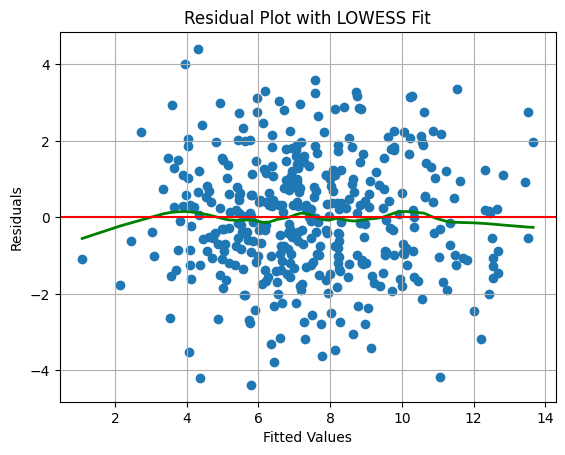

In [26]:
model = LinearRegression().fit(X, y) 
y_pred = model.predict(X) 
residuals = y - y_pred 
lowess = sm.nonparametric.lowess 
smoothed = lowess(residuals,y_pred, frac=0.3) 
plt.scatter(y_pred, residuals) 
plt.plot(smoothed[:, 0], smoothed[:, 1], color="green",label="LOWESS Fit", linewidth=2)
plt.axhline(y=0, color="r", linestyle="-") 
plt.xlabel("Fitted Values") 
plt.ylabel("Residuals") 
plt.title("Residual Plot with LOWESS Fit") 
plt.grid(True) 
plt.show()


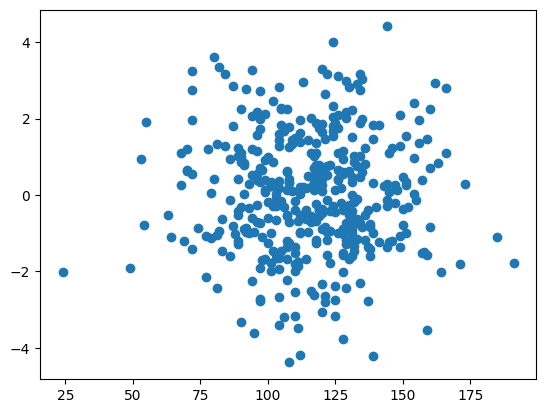

In [27]:
plt.scatter(X["Price"], residuals); 


Text(0, 0.5, 'Residuals')

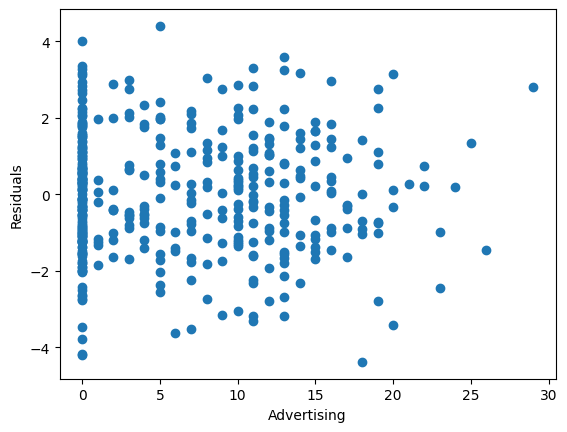

In [32]:
plt.scatter(X["Advertising"], residuals); 
plt.xlabel("Advertising")
plt.ylabel("Residuals")

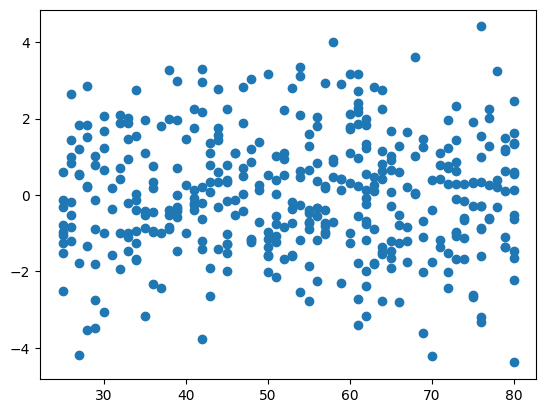

In [29]:
plt.scatter(X["Age"], residuals); 

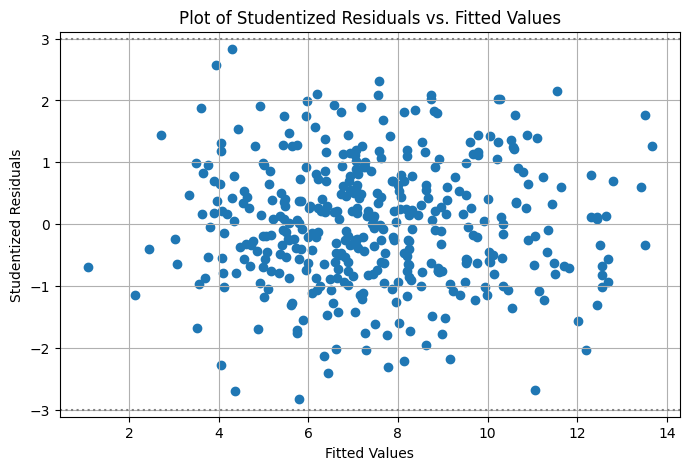

In [30]:
model = sm.OLS(y, X).fit() 
influence = model.get_influence() 
studentized_residuals = influence.resid_studentized_external 
fitted_values = model.fittedvalues 
plt.figure(figsize=(8, 5)) 
plt.scatter(fitted_values,studentized_residuals) 
plt.axhline(y=3, color="gray", linestyle=":") 
plt.axhline(y=-3, color="gray", linestyle=":") 
plt.xlabel("Fitted Values") 
plt.ylabel("Studentized Residuals") 
plt.title("Plot of Studentized Residuals vs. Fitted Values") 
plt.grid(True) 
plt.show()


            Sales       Price  Advertising         Age
count  400.000000  400.000000   400.000000  400.000000
mean     7.496325  115.795000     6.635000   53.322500
std      2.824115   23.676664     6.650364   16.200297
min      0.000000   24.000000     0.000000   25.000000
25%      5.390000  100.000000     0.000000   39.750000
50%      7.490000  117.000000     5.000000   54.500000
75%      9.320000  131.000000    12.000000   66.000000
max     16.270000  191.000000    29.000000   80.000000
ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
381,3.90,124,65,21,496,151,Bad,77,13,Yes,Yes
174,0.00,139,24,0,358,185,Medium,79,15,No,No
165,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes
310,9.53,175,65,29,419,166,Medium,53,12,Yes,Yes
42,10.43,77,69,0,25,24,Medium,50,18,Yes,No


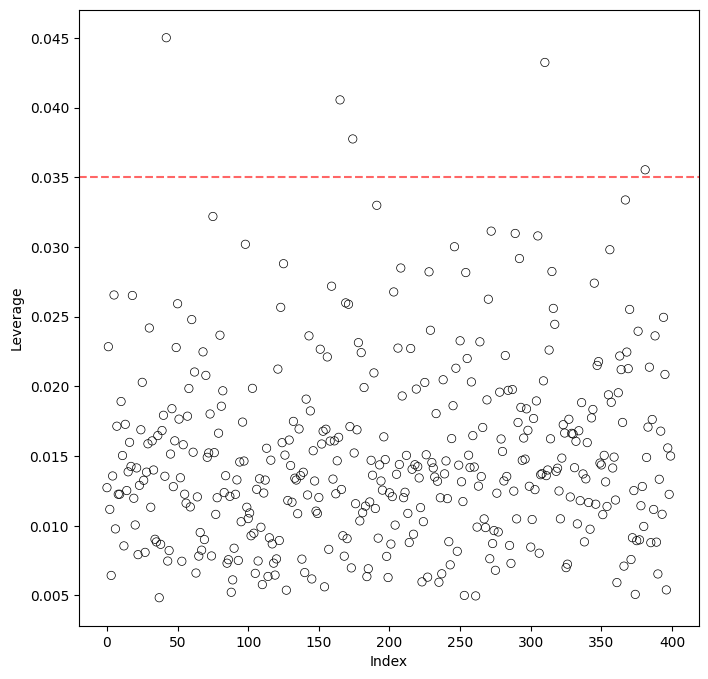

In [33]:
h_avg = ((X.shape[1]+1)/X.shape[0]) 
infl= results.get_influence() 
_, ax = plt.subplots(figsize=(8,8)) 
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, marker="o", facecolors="none", edgecolors="black", linewidths=0.5) 
ax.axhline(2*h_avg, ls="--", c="r", alpha=0.6) 
ax.set_xlabel("Index") 
ax.set_ylabel("Leverage");
df = pd.DataFrame(carseats) 
print(df[["Sales","Price","Advertising","Age"]].describe())
print(df["ShelveLoc"].value_counts())
leverage_count = sum(1 for number in infl.hat_matrix_diag if number > 2*h_avg)
np.argsort(infl.hat_matrix_diag)[-leverage_count:] 
carseats.iloc[np.argsort(infl.hat_matrix_diag)[-leverage_count:]]
